In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
data = pd.read_csv('customer_data.csv', encoding='ISO-8859-1')
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [74]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [75]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [76]:
#convert the 'InvoiceDate' column
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [77]:
data['CustomerID'] = data['CustomerID'].astype(int)
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object

In [78]:
#Creating a new column that stores Total order value/Revenue
data['Total order value'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total order value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [79]:
#Checking for Unique Total order value
#data['Total order value'].value_counts()
#data['UnitPrice'].value_counts()
#data['Quantity'].value_counts()
#Removing Rows that have negative Quantity
#data.drop(data[data['Quantity']<0].index,inplace=True)
#data['Quantity'].value_counts()

### 2. Customer Analysis

In [81]:
print('Number of unique coustomer: ', data['CustomerID'].nunique())
print('Number of unique date: ', data['InvoiceDate'].nunique())

Number of unique coustomer:  4372
Number of unique date:  20460


##### Top 5 Coustomer by Total Order Value

In [82]:
customer_revenue = data.groupby('CustomerID')['Total order value'].sum().reset_index()
customer_revenue = customer_revenue.sort_values(by='Total order value', ascending=False)

print('Top 5 coustomer by Total order value: ')
customer_revenue.head(5)

Top 5 coustomer by Total order value: 


,CustomerID,Total order value
1703,14646,279489.02
4233,18102,256438.49
3758,17450,187482.17
1895,14911,132572.62
55,12415,123725.45


##### Top 5 Coustomers by most purchases by Order count

In [83]:
customer_order_count = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Rename the columns for clarity
customer_order_count.columns = ['CustomerID', 'OrderCount']

customer_order_count = customer_order_count.sort_values(by='OrderCount', ascending=False)

print('Top 5 coustomer by Most purchases: ')
customer_order_count.head(5)

Top 5 coustomer by Most purchases: 


,CustomerID,OrderCount
1895,14911,248
330,12748,224
4042,17841,169
1674,14606,128
568,13089,118


#####  Distribution of the number of orders per customer?

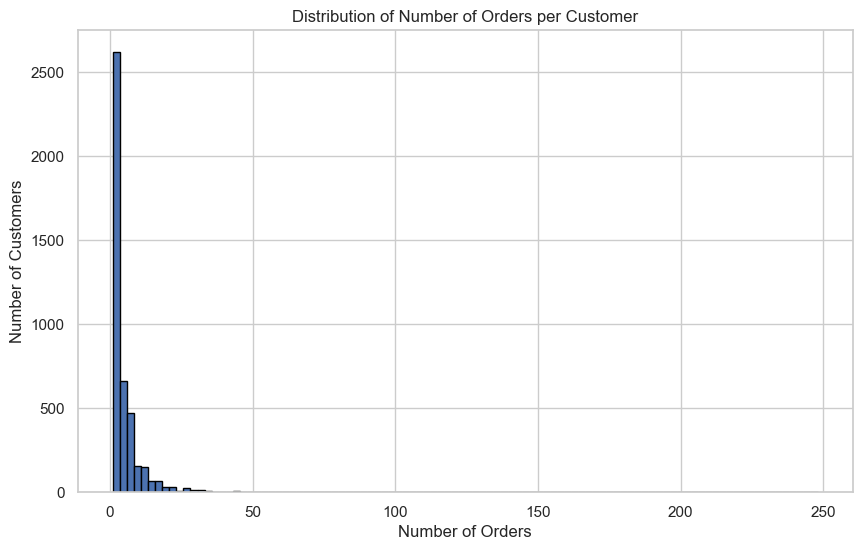

In [84]:
plt.figure(figsize=(10, 6))
plt.hist(customer_order_count['OrderCount'], bins=100, edgecolor='black')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

### 3. Product Analysis

##### Top 10 most frequently purchased products?

In [85]:
product_quantity = data.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

product_quantity = product_quantity.sort_values(by='Quantity', ascending=False)

print('Top 10 most frequently purchased products: ')
product_quantity.head(10)

Top 10 most frequently purchased products: 


,StockCode,Description,Quantity
3028,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
3460,85099B,JUMBO BAG RED RETROSPOT,45066
3288,84879,ASSORTED COLOUR BIRD ORNAMENT,35314
3475,85123A,WHITE HANGING HEART T-LIGHT HOLDER,34147
434,21212,PACK OF 72 RETROSPOT CAKE CASES,33409
1112,22197,POPCORN HOLDER,30504
2010,23084,RABBIT NIGHT LIGHT,27094
1387,22492,MINI PAINT SET VINTAGE,25880
1509,22616,PACK OF 12 LONDON TISSUES,25321
930,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24163


##### Average price of products in the Dataset

In [86]:
avg_price = round(np.mean(data['UnitPrice']), 2)
print('Average Unit price of product: ', avg_price)

Average Unit price of product:  3.46


##### Product Category that Generates Highest Revenue

In [87]:
category_revenue = data.groupby(['StockCode', 'Description'])['Total order value'].sum().reset_index()

category_revenue = category_revenue.sort_values(by='Total order value', ascending=False)
print('Product category with highest revenue: ')
category_revenue.head(1)

Product category with highest revenue: 


,StockCode,Description,Total order value
1322,22423,REGENCY CAKESTAND 3 TIER,132870.4


### Time Analysis

In [88]:
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()

# Group the data by 'DayOfWeek' and calculate the order count for each day
orders_per_day = data.groupby('DayOfWeek')['InvoiceNo'].nunique().reset_index()

# Sort the results by order count in descending order
orders_per_day = orders_per_day.sort_values(by='InvoiceNo', ascending=False)

# Print the resulting DataFrame
print(orders_per_day)

   DayOfWeek  InvoiceNo
3   Thursday       4978
5  Wednesday       4110
4    Tuesday       3892
1     Monday       3512
0     Friday       3356
2     Sunday       2342


In [89]:
data['HourOfDay'] = data['InvoiceDate'].dt.hour

#Group the data by 'HourOfDay' and calculate the order count for each hour
orders_per_hour = data.groupby('HourOfDay')['InvoiceNo'].nunique().reset_index()

#Sort the results by order count in descending order
orders_per_hour = orders_per_hour.sort_values(by='InvoiceNo', ascending=False)

#Print the resulting DataFrame
print(orders_per_hour)

    HourOfDay  InvoiceNo
6          12       3597
7          13       3043
5          11       2770
8          14       2645
4          10       2613
9          15       2405
3           9       1622
10         16       1491
11         17        842
2           8        608
12         18        257
13         19        217
1           7         31
14         20         28
0           6         22


##### Looking for seasonal patterns

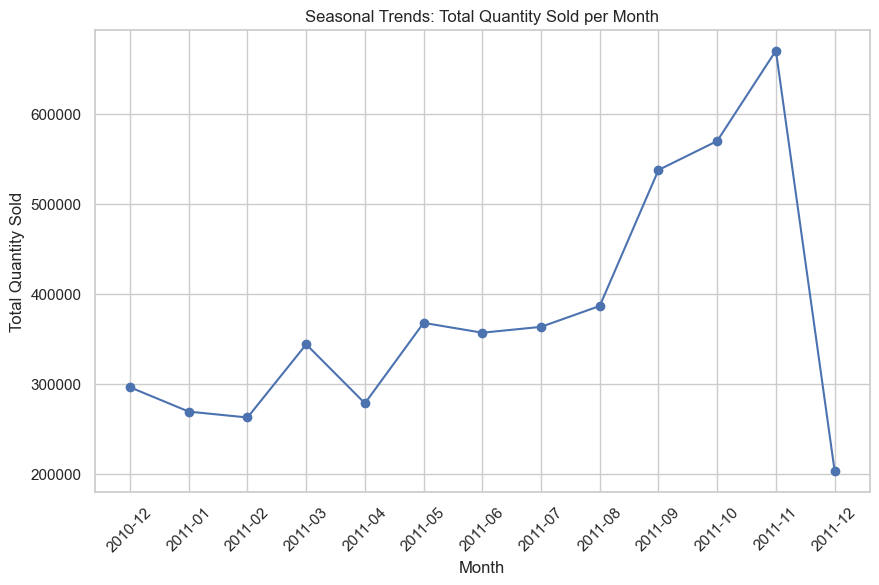

In [90]:
data['Month'] = data['InvoiceDate'].dt.to_period('M').astype(str)
monthly_trends = data.groupby('Month')['Quantity'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_trends['Month'], monthly_trends['Quantity'], marker='o')
plt.title('Seasonal Trends: Total Quantity Sold per Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

##### Top 5 Countries with highest orders

In [91]:
orders_per_country = data.groupby('Country')['InvoiceNo'].nunique().reset_index()

# Sort the results by order count in descending order
orders_per_country = orders_per_country.sort_values(by='InvoiceNo', ascending=False)

print('Top 5 countries with highest orders: ')
orders_per_country.head(5)

Top 5 countries with highest orders: 


,Country,InvoiceNo
35,United Kingdom,19857
14,Germany,603
13,France,458
10,EIRE,319
3,Belgium,119


##### Corelation

In [92]:
avg_order_value_per_country = data.groupby('Country')['Total order value'].mean().reset_index()

# Print the resulting DataFrame
print(avg_order_value_per_country)

                 Country  Total order value
0              Australia         108.877895
1                Austria          25.322494
2                Bahrain          32.258824
3                Belgium          19.773301
4                 Brazil          35.737500
5                 Canada          24.280662
6        Channel Islands          26.499063
7                 Cyprus          20.813971
8         Czech Republic          23.590667
9                Denmark          48.247147
10                  EIRE          33.438239
11    European Community          21.176230
12               Finland          32.124806
13                France          23.167217
14               Germany          23.348943
15                Greece          32.263836
16               Iceland          23.681319
17                Israel          27.977000
18                 Italy          21.034259
19                 Japan          98.716816
20               Lebanon          37.641778
21             Lithuania        

### RFM Analysis

##### Recency

In [93]:
import datetime as dt
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
day = dt.datetime(2011,12,10)
RFM_Scores = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (day - x.max()).days, 
                                             'InvoiceNo': lambda x: len(x),
                                             'Total order value': lambda x: x.sum()})

RFM_Scores['InvoiceDate'] = RFM_Scores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFM_Scores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total order value': 'Monetary'}, inplace=True)

RFM_Scores.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,2,0.00
12347,2,182,4310.00
12348,75,31,1797.24
12349,18,73,1757.55
12350,310,17,334.40


In [94]:
#Descriptive Statistics (Recency)
RFM_Scores.Recency.describe()

count    4372.000000
mean       91.581199
std       100.772139
min         0.000000
25%        16.000000
50%        50.000000
75%       143.000000
max       373.000000
Name: Recency, dtype: float64

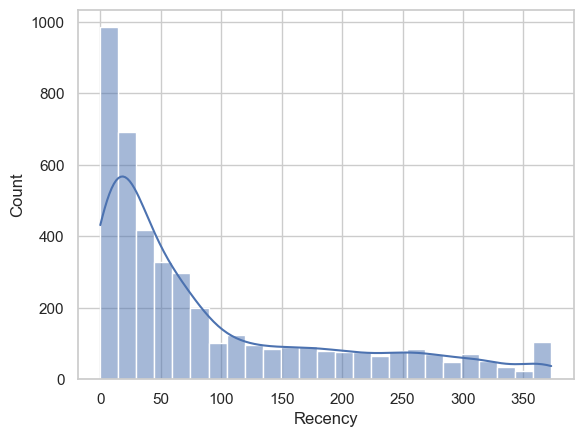

In [95]:
#Recency distribution plot

x = RFM_Scores['Recency']
ax = sns.histplot(x, kde = True)

In [96]:
#Descriptive Statistics (Frequency)
RFM_Scores.Frequency.describe()

count    4372.000000
mean       93.053294
std       232.471608
min         1.000000
25%        17.000000
50%        42.000000
75%       102.000000
max      7983.000000
Name: Frequency, dtype: float64

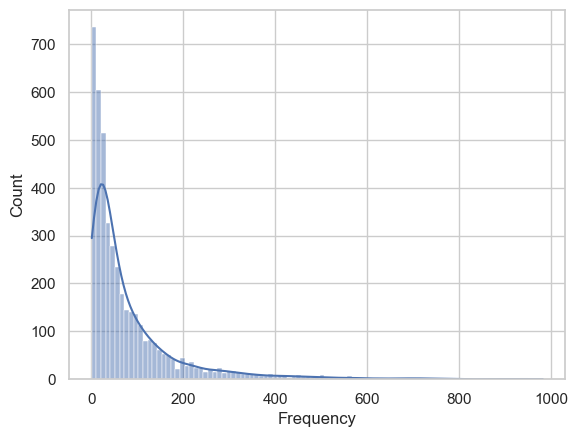

In [97]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x = RFM_Scores.query('Frequency < 1000')['Frequency']

ax = sns.histplot(x, kde = True)

In [98]:
#Descriptive Statistics (Monetary)
RFM_Scores.Monetary.describe()

count      4372.000000
mean       1898.459701
std        8219.345141
min       -4287.630000
25%         293.362500
50%         648.075000
75%        1611.725000
max      279489.020000
Name: Monetary, dtype: float64

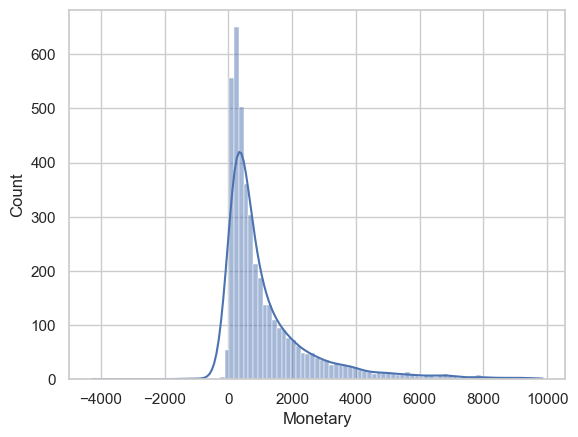

In [99]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
x = RFM_Scores.query('Monetary < 10000')['Monetary']

ax = sns.histplot(x, kde = True)

In [100]:
#Split into four segments using quantiles
quantiles = RFM_Scores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [101]:
quantiles

{'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 102.0},
 'Monetary': {0.25: 293.3625, 0.5: 648.0750000000002, 0.75: 1611.725}}

In [102]:
#Functions to create R, F and M segments
#While R scoring we will give lower value of the more recent recency
#While F and M scoring we will give high value to more frequent and monetary values
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [103]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFM_Scores['R'] = RFM_Scores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFM_Scores['F'] = RFM_Scores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFM_Scores['M'] = RFM_Scores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFM_Scores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,325,2,0.00,4,4,4
12347,2,182,4310.00,1,1,1
12348,75,31,1797.24,3,3,1
12349,18,73,1757.55,2,2,1
12350,310,17,334.40,4,4,3


In [104]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFM_Scores['RFMScore'] = RFM_Scores[['R', 'F', 'M']].sum(axis = 1)
RFM_Scores.head()

,Recency,Frequency,Monetary,R,F,M,RFMScore
CustomerID,,,,,,,
12346,325,2,0.00,4,4,4,12
12347,2,182,4310.00,1,1,1,3
12348,75,31,1797.24,3,3,1,7
12349,18,73,1757.55,2,2,1,5
12350,310,17,334.40,4,4,3,11


In [105]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFM_Scores.RFMScore, q = 4, labels = Loyalty_Level)
RFM_Scores['RFM_Loyalty_Level'] = Score_cuts.values
RFM_Scores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore,RFM_Loyalty_Level
0,12346,325,2,0.00,4,4,4,12,Bronze
1,12347,2,182,4310.00,1,1,1,3,Platinum
2,12348,75,31,1797.24,3,3,1,7,Gold
3,12349,18,73,1757.55,2,2,1,5,Platinum
4,12350,310,17,334.40,4,4,3,11,Bronze


In [106]:
RFM_Scores['RFMScore'].value_counts()

10    520
7     466
9     466
3     458
8     447
5     437
6     418
12    391
11    390
4     379
Name: RFMScore, dtype: int64

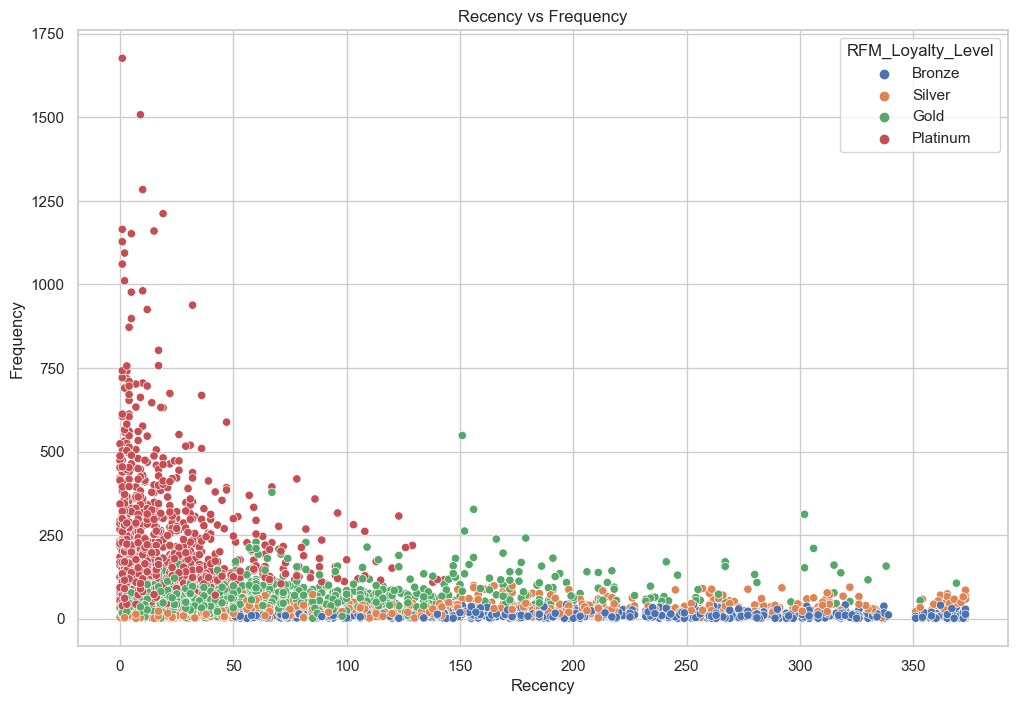

In [107]:
graph = RFM_Scores.query("Monetary < 50000 and Frequency < 2000")
# Set the style for Seaborn
sns.set(style="whitegrid")

# Recency Vs Frequency
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Recency',
    y='Frequency',
    hue='RFM_Loyalty_Level',
    data=graph,
    palette="deep",
    sizes=(20, 200),
    hue_order=['Bronze', 'Silver', 'Gold', 'Platinum']
)
plt.title('Recency vs Frequency')
plt.show()

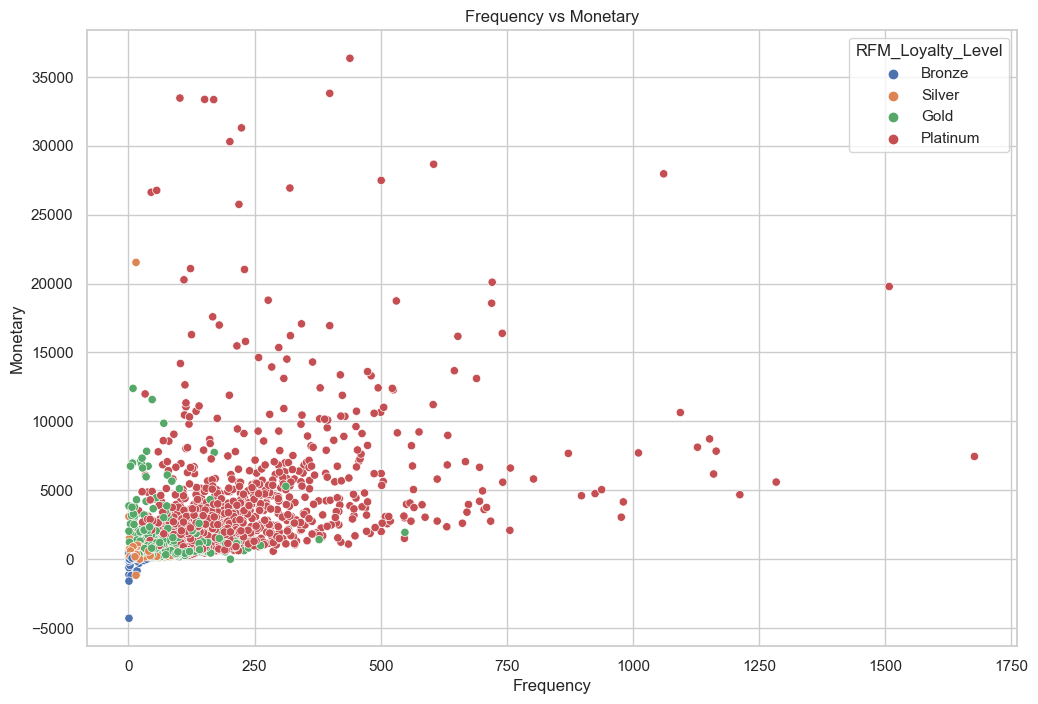

In [108]:
# Frequency Vs Monetary
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Frequency',
    y='Monetary',
    hue='RFM_Loyalty_Level',
    data=graph,
    palette="deep",
    sizes=(20, 200),
    hue_order=['Bronze', 'Silver', 'Gold', 'Platinum']
)
plt.title('Frequency vs Monetary')
plt.show()

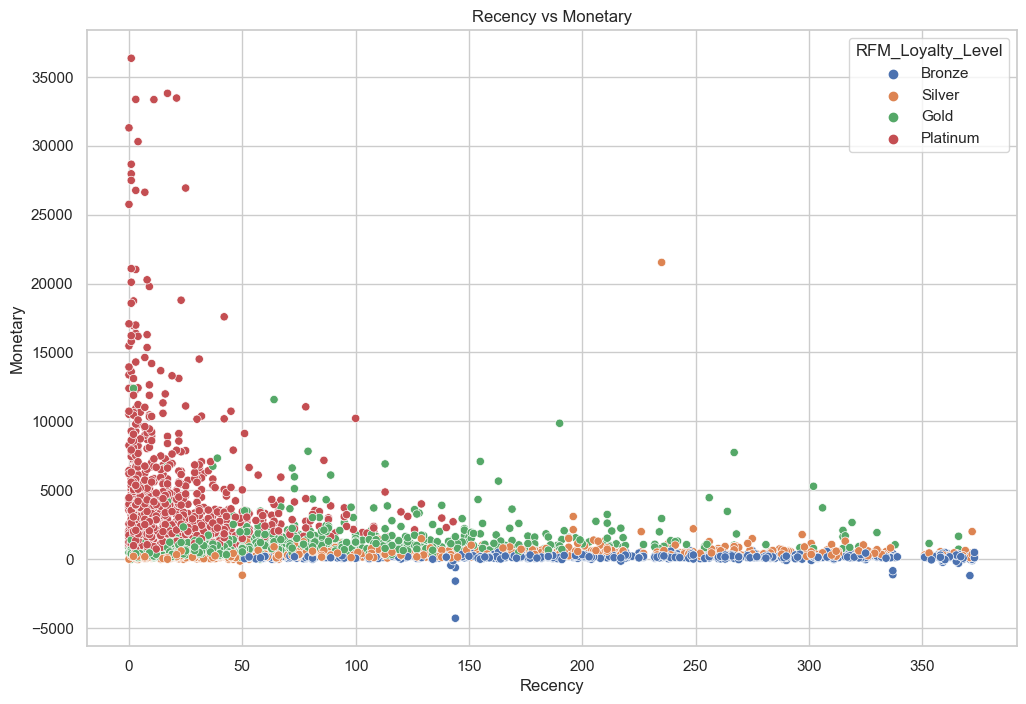

In [109]:
# Recency Vs Monetary
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Recency',
    y='Monetary',
    hue='RFM_Loyalty_Level',
    data=graph,
    palette="deep",
    sizes=(20, 200),
    hue_order=['Bronze', 'Silver', 'Gold', 'Platinum']
)
plt.title('Recency vs Monetary')
plt.show()

## K-Means Clustering

In [168]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFM_Scores['Recency'] = [handle_neg_n_zero(x) for x in RFM_Scores.Recency]
RFM_Scores['Monetary'] = [handle_neg_n_zero(x) for x in RFM_Scores.Monetary]
X = RFM_Scores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X)

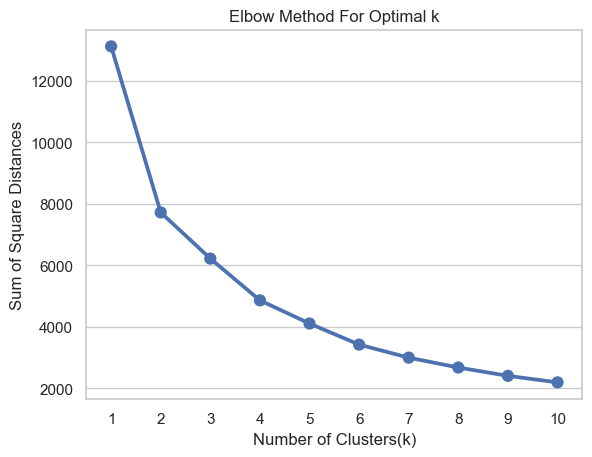

In [170]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,11):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 300, n_init=10)
    km = km.fit(scaled)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [171]:
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300, n_init=10)
KMean_clust.fit(scaled)

#Find the clusters for the observation given in the dataset
RFM_Scores['Cluster'] = KMean_clust.labels_
RFM_Scores.head()

,Recency,Frequency,Monetary,R,F,M,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,
12346,325,2,1.00,4,4,4,12,Bronze,2,blue
12347,2,182,4310.00,1,1,1,3,Platinum,0,red
12348,75,31,1797.24,3,3,1,7,Gold,1,green
12349,18,73,1757.55,2,2,1,5,Platinum,0,red
12350,310,17,334.40,4,4,3,11,Bronze,2,blue


In [172]:
RFM_Scores.tail()

,Recency,Frequency,Monetary,R,F,M,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,
18280,277,10,180.60,4,4,4,12,Bronze,2,blue
18281,180,7,80.82,4,4,4,12,Bronze,2,blue
18282,7,13,176.60,1,4,4,9,Silver,1,green
18283,3,756,2094.88,1,1,1,3,Platinum,0,red
18287,42,70,1837.28,2,2,1,5,Platinum,1,green


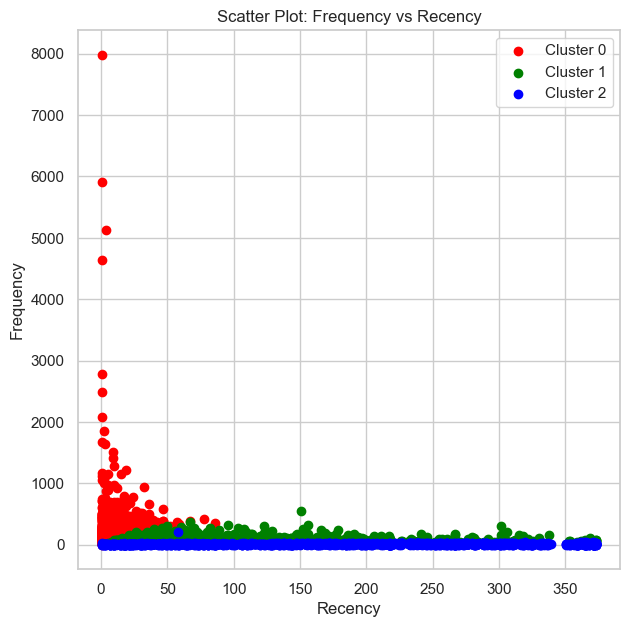

In [173]:
plt.figure(figsize=(7, 7))

# Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFM_Scores['Color'] = RFM_Scores['Cluster'].map(lambda p: Colors[p])

for cluster, color in zip(range(len(Colors)), Colors):
    cluster_data = RFM_Scores[RFM_Scores['Cluster'] == cluster]
    plt.scatter(
        x=cluster_data["Recency"],
        y=cluster_data["Frequency"],
        c=color,
        label=f'Cluster {cluster}'
    )

# Add labels and title
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.title("Scatter Plot: Frequency vs Recency")

# Add legend
plt.legend()

# Show the plot
plt.show()

In [174]:
RFM_Scores['RFM_Loyalty_Level'].value_counts()

Gold        1331
Platinum    1274
Silver       986
Bronze       781
Name: RFM_Loyalty_Level, dtype: int64

In [175]:
RFM_Scores['Cluster'].value_counts()

1    1921
2    1295
0    1156
Name: Cluster, dtype: int64

In [176]:
group = RFM_Scores.groupby(['Cluster'])['Recency', 'Frequency', 'Monetary'].mean()
group

C:\Users\sehaj\AppData\Local\Temp\ipykernel_30628\3292339207.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = RFM_Scores.groupby(['Cluster'])['Recency', 'Frequency', 'Monetary'].mean()


,Recency,Frequency,Monetary
Cluster,,,
0,10.763841,234.626298,5177.491843
1,84.402915,62.581989,1035.940673
2,174.401544,11.877220,261.099885


##  Marketing Recommendations:

#### Cluster 0 - Platinum Customer

##### Recency (10.76):
1. Engage with personalized loyalty programs to maintain their loyalty.
2. Offer exclusive early access to new products or promotions to keep them engaged.

##### Frequency (234.63):
1. Recognize and reward their frequent purchases with exclusive discounts or special offers.
2. Encourage them to join a premium loyalty program for additional benefits.

##### Monetary (5177.49):
1. Introduce high-end or premium products to cater to their spending capacity.
2. Offer special discounts on bulk purchases or exclusive access to premium products.

#### Cluster 1: Gold and Silver


##### Recency (84.40):

1. Implement targeted re-engagement campaigns to bring them back to the platform.
2. Provide time-sensitive discounts to encourage prompt purchases.


##### Frequency (62.58):
1. Create personalized product recommendations to increase their purchase frequency.
2. Introduce a tiered loyalty program to incentivize more frequent purchases.


##### Monetary (1035.94):
1. Offer tiered discounts based on spending levels to encourage higher-value transactions.
2. Provide special promotions for reaching specific spending milestones.

#### Cluster 2: Bronze


##### Recency (174.40):
1. Implement win-back campaigns to re-engage customers who haven't made recent purchases.
2. Provide time-limited incentives to encourage their return.


##### Frequency (11.88):
1. Focus on increasing customer engagement through targeted marketing campaigns.
2. Introduce a referral program to encourage them to bring in new customers.


##### Monetary (261.10):
1. Provide discounts or promotions for specific products to stimulate higher-value transactions.
2. Introduce bundle offers or package deals to increase the average transaction value.

### General Recommendations:

1. Implement a comprehensive customer feedback system to understand preferences and pain points.
2. Utilize data analytics to continuously refine and optimize marketing strategies.
3. Personalize communication channels, such as email marketing and promotions, based on customer preferences.
4. Regularly update product offerings to keep customers excited and engaged.